In [1]:
!pip install gensim
!pip install pyLDAvis
!pip install spacy
!pip install wordcloud
!pip install nltk
!pip install scikit-learn
!pip install scipy

!python -m spacy download en_core_web_lg

  Created wheel for pyLDAvis: filename=pyLDAvis-3.2.2-py2.py3-none-any.whl size=135593 sha256=f1c8d929163a4de60d913e6815e1e87cc358ca179e682c2ddf6f9d382e228944
  Stored in directory: c:\users\eric\appdata\local\pip\cache\wheels\2a\5b\b3\26b52781cdeea9c815e147cfd4ac4a0a3472bce92142115670
  Created wheel for future: filename=future-0.18.2-py3-none-any.whl size=491059 sha256=d693202b110ec9195f5c87979f96a347f5d5075c655058bf244e863978be337d
  Stored in directory: c:\users\eric\appdata\local\pip\cache\wheels\8e\70\28\3d6ccd6e315f65f245da085482a2e1c7d14b90b30f239e2cf4
Successfully built pyLDAvis future


  Created wheel for nltk: filename=nltk-3.5-py3-none-any.whl size=1434674 sha256=7d641d957d181effc52410c9e8d32e7f220b6ef9f7525b3f4a11e61eeb11115c
  Stored in directory: c:\users\eric\appdata\local\pip\cache\wheels\ff\d5\7b\f1fb4e1e1603b2f01c2424dd60fbcc50c12ef918bafc44b155
Successfully built nltk

2021-03-09 18:15:35.559160: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2021-03-09 18:15:35.559192: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.



[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [4]:
### import libs
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter

import gensim
import numpy as np
import pandas as pd
import math

from scipy.sparse import csr_matrix
from sklearn.preprocessing import normalize

from gensim.models import CoherenceModel, LdaModel, LsiModel, HdpModel
from gensim.models.wrappers import LdaMallet
from gensim.corpora import Dictionary
import pyLDAvis.gensim

import nltk
nltk.download('stopwords')
nltk.download('vader_lexicon')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import text

import os, re, operator, warnings
warnings.filterwarnings('ignore')
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Eric\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Eric\AppData\Roaming\nltk_data...
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Eric\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


In [11]:
def clean(text):
    return str(''.join([i if ord(i) < 128 else ' ' for i in text]))

test_data_dir = '{}'.format(os.sep).join([gensim.__path__[0], 'test', 'test_data'])
lee_train_file = test_data_dir + os.sep + 'lee_background.cor'

In [7]:
import spacy

text = open(lee_train_file).read()
nlp = spacy.load('en_core_web_lg')
stop_words = stopwords.words('english')

In [13]:
for stopword in stop_words:
    lexeme = nlp.vocab[stopword]
    lexeme.is_stop = True

In [14]:
doc = nlp(clean(text))

In [15]:
doc

Hundreds of people have been forced to vacate their homes in the Southern Highlands of New South Wales as strong winds today pushed a huge bushfire towards the town of Hill Top. A new blaze near Goulburn, south-west of Sydney, has forced the closure of the Hume Highway. At about 4:00pm AEDT, a marked deterioration in the weather as a storm cell moved east across the Blue Mountains forced authorities to make a decision to evacuate people from homes in outlying streets at Hill Top in the New South Wales southern highlands. An estimated 500 residents have left their homes for nearby Mittagong. The New South Wales Rural Fire Service says the weather conditions which caused the fire to burn in a finger formation have now eased and about 60 fire units in and around Hill Top are optimistic of defending all properties. As more than 100 blazes burn on New Year's Eve in New South Wales, fire crews have been called to new fire at Gunning, south of Goulburn. While few details are available at this

In [17]:
texts, article = [], []
for w in doc:
    if w.text != '\n' and not w.is_stop and not w.is_punct and not w.like_num:
        article.append(w.lemma_)
    if w.text == '\n':
        texts.append(article)
        article = []

In [18]:
texts

[['hundred',
  'people',
  'force',
  'vacate',
  'home',
  'Southern',
  'Highlands',
  'New',
  'South',
  'Wales',
  'strong',
  'wind',
  'today',
  'push',
  'huge',
  'bushfire',
  'town',
  'Hill',
  'new',
  'blaze',
  'near',
  'Goulburn',
  'south',
  'west',
  'Sydney',
  'force',
  'closure',
  'Hume',
  'Highway',
  '4:00pm',
  'AEDT',
  'marked',
  'deterioration',
  'weather',
  'storm',
  'cell',
  'move',
  'east',
  'Blue',
  'Mountains',
  'force',
  'authority',
  'decision',
  'evacuate',
  'people',
  'home',
  'outlying',
  'street',
  'Hill',
  'New',
  'South',
  'Wales',
  'southern',
  'highland',
  'estimated',
  'resident',
  'leave',
  'home',
  'nearby',
  'Mittagong',
  'New',
  'South',
  'Wales',
  'Rural',
  'Fire',
  'Service',
  'say',
  'weather',
  'condition',
  'cause',
  'fire',
  'burn',
  'finger',
  'formation',
  'ease',
  'fire',
  'unit',
  'Hill',
  'optimistic',
  'defend',
  'property',
  'blaze',
  'burn',
  'New',
  'Year',
  'Eve',


In [19]:
transformed_texts = [' '.join(i) for i in texts]
transformed_texts

['hundred people force vacate home Southern Highlands New South Wales strong wind today push huge bushfire town Hill new blaze near Goulburn south west Sydney force closure Hume Highway 4:00pm AEDT marked deterioration weather storm cell move east Blue Mountains force authority decision evacuate people home outlying street Hill New South Wales southern highland estimated resident leave home nearby Mittagong New South Wales Rural Fire Service say weather condition cause fire burn finger formation ease fire unit Hill optimistic defend property blaze burn New Year Eve New South Wales fire crew call new fire gunning south Goulburn detail available stage fire authority say close Hume Highway direction new fire Sydney west long threaten property Cranebrook area rain fall part Illawarra Sydney Hunter Valley north coast Bureau Meteorology Claire Richards say rain little ease fire burn state fall isolate area generally fall millimetre say place significant millimetre relief far rain concern fac

In [20]:
transformed_texts_1 = [i.lower() for i in transformed_texts]
transformed_texts_1

['hundred people force vacate home southern highlands new south wales strong wind today push huge bushfire town hill new blaze near goulburn south west sydney force closure hume highway 4:00pm aedt marked deterioration weather storm cell move east blue mountains force authority decision evacuate people home outlying street hill new south wales southern highland estimated resident leave home nearby mittagong new south wales rural fire service say weather condition cause fire burn finger formation ease fire unit hill optimistic defend property blaze burn new year eve new south wales fire crew call new fire gunning south goulburn detail available stage fire authority say close hume highway direction new fire sydney west long threaten property cranebrook area rain fall part illawarra sydney hunter valley north coast bureau meteorology claire richards say rain little ease fire burn state fall isolate area generally fall millimetre say place significant millimetre relief far rain concern fac

In [21]:
transformed_texts_2 = [re.sub(r'\w*\d\w*', '', i).strip() for i in transformed_texts_1]
transformed_texts_2

['hundred people force vacate home southern highlands new south wales strong wind today push huge bushfire town hill new blaze near goulburn south west sydney force closure hume highway : aedt marked deterioration weather storm cell move east blue mountains force authority decision evacuate people home outlying street hill new south wales southern highland estimated resident leave home nearby mittagong new south wales rural fire service say weather condition cause fire burn finger formation ease fire unit hill optimistic defend property blaze burn new year eve new south wales fire crew call new fire gunning south goulburn detail available stage fire authority say close hume highway direction new fire sydney west long threaten property cranebrook area rain fall part illawarra sydney hunter valley north coast bureau meteorology claire richards say rain little ease fire burn state fall isolate area generally fall millimetre say place significant millimetre relief far rain concern fact pro

In [25]:
test = nlp(transformed_texts_2[0])

In [47]:
unique_adjectives = []
for text in transformed_texts_2:
    transformed = nlp(text)
    for token in transformed:
        if token.pos_ == 'ADJ':
            if token.text not in unique_adjectives:
                    unique_adjectives.append(token.text)
                    
len(unique_adjectives)

986

In [43]:
unique_adjectives

['southern',
 'new',
 'south',
 'strong',
 'huge',
 'marked',
 'blue',
 'outlying',
 'rural',
 'optimistic',
 'available',
 'close',
 'little',
 'significant',
 'far',
 'associate',
 'indian',
 'suspect',
 'militant',
 'pakistani',
 'extremist',
 'taiba',
 'jaish',
 'behest',
 'military',
 'tat',
 'diplomatic',
 'national',
 'few',
 'western',
 'northern',
 'free',
 'political',
 'economic',
 'interim',
 'key',
 'massive',
 'foreign',
 'senior',
 'fresh',
 'bad',
 'international',
 'inappropriate',
 'unprofessional',
 'chief',
 'executive',
 'angry',
 'federal',
 'safe',
 'afghani',
 'long',
 'major',
 'mass',
 'pacific',
 'total',
 'temporary',
 'decisive',
 'single',
 'unbeatable',
 'old',
 'shaky',
 'straight',
 'swiss',
 'final',
 'great',
 'tentative',
 'hard',
 'minute',
 'american',
 'tough',
 'junior',
 'early',
 'complete',
 'relative',
 'tenacious',
 'hot',
 'dusty',
 'red',
 'welcome',
 'mild',
 'severe',
 'dry',
 'high',
 'westerly',
 'reluctant',
 'excited',
 'favourable',

In [50]:
def IDF(corpus, unique_words):
    idf_dic = {}
    N = len(corpus)
    for i in unique_words:
        count = 0
        for sen in corpus:
            if i in sen.split():
                count += 1
            idf_dic[i] = (math.log((N+1)/(count+1))) + 1
    return idf_dic

def fit(whole_data):
    unique_words = set()
    if isinstance(whole_data, (list,)):
        for x in whole_data:
            for y in x.split():
                if len(y) < 2:
                    continue
                unique_words.add(y)
        unique_words = sorted(list(unique_words))
        vocab = {j:i for i, j in enumerate(unique_words)}
        idf_values_of_all_unique_words = IDF(whole_data, unique_words)
    return vocab, idf_values_of_all_unique_words

def transform(dataset, vocabulary, idf_values):
    vocab = {}
    sparse_matrix = csr_matrix((len(dataset), len(vocabulary)), dtype=np.float64)
    for row in range(0, len(dataset)):
        number_of_words_in_sentence = Counter(dataset[row].split())
        for word in dataset[row].split():
            if word in list(vocabulary.keys()):
                tf_idf_value = (number_of_words_in_sentence[word]/len(dataset[row].split()))*(idf_values[word])
                sparse_matrix[row, vocabulary[word]] = tf_idf_value
                vocab[word] = tf_idf_value
    return vocab

In [51]:
Vocabulary, idf_of_vocabulary = fit(transformed_texts_2)

In [64]:
sorted_vocab = sorted(idf_of_vocabulary.items(), key=lambda x: x[1], reverse=True)

[('aamer', 6.0106352940962555),
 ('aarage', 6.0106352940962555),
 ('abbott', 6.0106352940962555),
 ('abdomen', 6.0106352940962555),
 ('abdominal', 6.0106352940962555),
 ('abduct', 6.0106352940962555),
 ('abduction', 6.0106352940962555),
 ('abide', 6.0106352940962555),
 ('ablution', 6.0106352940962555),
 ('ably', 6.0106352940962555),
 ('abortion', 6.0106352940962555),
 ('abruptly', 6.0106352940962555),
 ('abstain', 6.0106352940962555),
 ('aca', 6.0106352940962555),
 ('academic', 6.0106352940962555),
 ('accc', 6.0106352940962555),
 ('accelerate', 6.0106352940962555),
 ('acceptable', 6.0106352940962555),
 ('accolade', 6.0106352940962555),
 ('accommodation', 6.0106352940962555),
 ('accountable', 6.0106352940962555),
 ('accounting', 6.0106352940962555),
 ('accrue', 6.0106352940962555),
 ('accuracy', 6.0106352940962555),
 ('accusation', 6.0106352940962555),
 ('achievement', 6.0106352940962555),
 ('acquisition', 6.0106352940962555),
 ('activist', 6.0106352940962555),
 ('actress', 6.0106352940

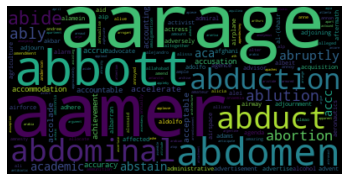

In [65]:
wordcloud = WordCloud().generate_from_frequencies(idf_of_vocabulary)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [68]:
stop_words.extend(['aamer'])
stopwords_dict = Counter(stop_words)
transformed_texts_3 = [' '.join([word for word in i.split() if word not in stopwords_dict]) for i in transformed_texts_2]

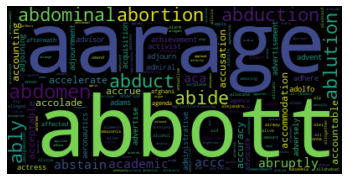

In [70]:
Vocabulary, idf_of_vocabulary = fit(transformed_texts_3)
wordcloud = WordCloud().generate_from_frequencies(idf_of_vocabulary)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [71]:
final_output = transform(transformed_texts_3, Vocabulary, idf_of_vocabulary)

In [72]:
final_output

{'hundred': 0.01833370536903864,
 'people': 0.03608595756191217,
 'force': 0.08338665510199662,
 'vacate': 0.03780273769871859,
 'home': 0.03748861398505311,
 'southern': 0.06345195296065549,
 'highlands': 0.03780273769871859,
 'new': 0.037475219440501965,
 'south': 0.04025061037060397,
 'wales': 0.05414073922941059,
 'strong': 0.19352845652999928,
 'wind': 0.02638385068735852,
 'today': 0.044512627639838674,
 'push': 0.01849736373190546,
 'huge': 0.011606164964576362,
 'bushfire': 0.03127934184433124,
 'town': 0.01585158771135653,
 'hill': 0.3515729854056834,
 'blaze': 0.07434175508751387,
 'near': 0.05257827726540527,
 'goulburn': 0.07560547539743719,
 'west': 0.01293256013382952,
 'sydney': 0.03484313994238426,
 'closure': 0.03224268710267152,
 'hume': 0.15789211791515753,
 'highway': 0.0779686191337801,
 'aedt': 0.024486296054463508,
 'marked': 0.03780273769871859,
 'deterioration': 0.03780273769871859,
 'weather': 0.06340635084542612,
 'storm': 0.16226445480262314,
 'cell': 0.2311

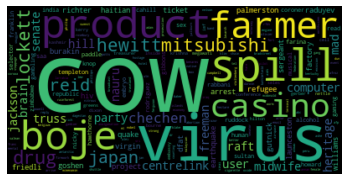

In [73]:
wordcloud = WordCloud().generate_from_frequencies(final_output)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## shortcut

In [76]:
tfidf = TfidfVectorizer(sublinear_tf=True, norm='l2', min_df=5, encoding='latin-1', ngram_range=(1,1), stop_words=stop_words)
features = tfidf.fit_transform(transformed_texts_3)
d = tfidf.vocabulary_

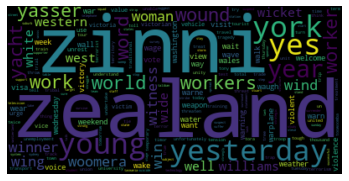

In [77]:
wordcloud = WordCloud().generate_from_frequencies(d)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [79]:
### vader

sid = SentimentIntensityAnalyzer()
for i in range(len(transformed_texts_3)):
    print(transformed_texts_3[i] + ':')
    scores = sid.polarity_scores(transformed_texts_3[i])
    print(scores)

hundred people force vacate home southern highlands new south wales strong wind today push huge bushfire town hill new blaze near goulburn south west sydney force closure hume highway : aedt marked deterioration weather storm cell move east blue mountains force authority decision evacuate people home outlying street hill new south wales southern highland estimated resident leave home nearby mittagong new south wales rural fire service say weather condition cause fire burn finger formation ease fire unit hill optimistic defend property blaze burn new year eve new south wales fire crew call new fire gunning south goulburn detail available stage fire authority say close hume highway direction new fire sydney west long threaten property cranebrook area rain fall part illawarra sydney hunter valley north coast bureau meteorology claire richards say rain little ease fire burn state fall isolate area generally fall millimetre say place significant millimetre relief far rain concern fact proba

{'neg': 0.091, 'neu': 0.764, 'pos': 0.145, 'compound': 0.6808}
israeli helicopter gunship warplane swoop palestinian city jewish state drop political bombshell palestinians decision cut tie yasser arafat rage deadly bus ambush apache helicopter f- fighter bomber blast security target gaza city pound night repeat air raid palestinian militant kill israelis west bank raid ramallah west bank hit missile hour early rocket strike send cloud flame smoke air ruin police station close centre town partly reoccupie israeli tank police station bomb october palestinian mob lynch israeli soldier large part ramallah plunge darkness raid jenin north apaches blast building mr arafat fatah movement witness say early israeli troop shoot palestinian child near rafah border crossing egypt southern gaza strip kill palestinian hospital official say israel say send force palestinian self rule area track militant mr arafat fail arrest despite huge international pressure week repeat air strike late wednesday l

{'neg': 0.091, 'neu': 0.755, 'pos': 0.154, 'compound': 0.6705}
defence minister robert hill confirm australian troop arrive afghanistan morning senator hill say advance party rest troop arrive day say australian force operate troop southern afghanistan fight taliban al qaeda network senator hill say operation month:
{'neg': 0.065, 'neu': 0.831, 'pos': 0.103, 'compound': 0.128}
israeli soldier shoot dead palestinians west bank town israeli military source say soldier shoot palestinians near jenin palestinian gunman open fire army patrol troop return fire palestinian kill israeli soldier near west bank city tulkarem palestinian security source say palestinian police arrest senior leader hardline hamas group crackdown net islamic militant follow wave suicide attack israel palestinian security source tell afp news agency hamas official confirm arrest senior leader ismail abu shanab ismail haniya say police issue arrest warrant refuse security source say militant hamas small islamic jihad r

In [ ]:
listopics = [[word for word, prob in topic] for topicid, topic in lsimodel.show_topics(formatted = False)]